# Importing the libraries

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Import the Dataset

In [2]:
Dataset = pd.read_csv('breast_cancer.csv')
Dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
# Droping the Sample Code Nummber Index
Dataset.drop('Sample code number',axis=1,inplace=True)

In [3]:
Dataset

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


# Exploring the Data

In [4]:
#Describe the Data
Dataset.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [5]:
# Checking the Null Values
Dataset.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

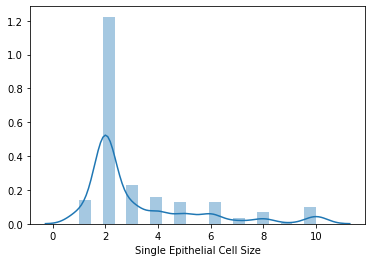

In [6]:
# Distplot of Single Epithelial Cell Size
sns.distplot(Dataset['Single Epithelial Cell Size'],norm_hist=False,kde=True,bins=20)

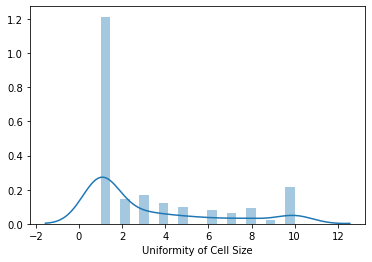

In [7]:
# Distplot of Uniformity of Cell Size
sns.distplot(Dataset['Uniformity of Cell Size'],norm_hist=False,kde=True,bins=20)

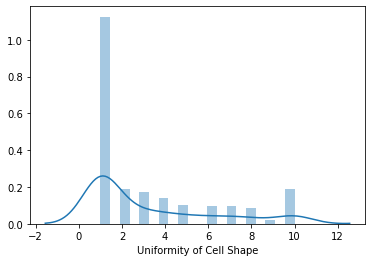

In [8]:
# Distplot of Uniformity of Cell Shape
sns.distplot(Dataset['Uniformity of Cell Shape'],norm_hist=False,kde=True,bins=20)

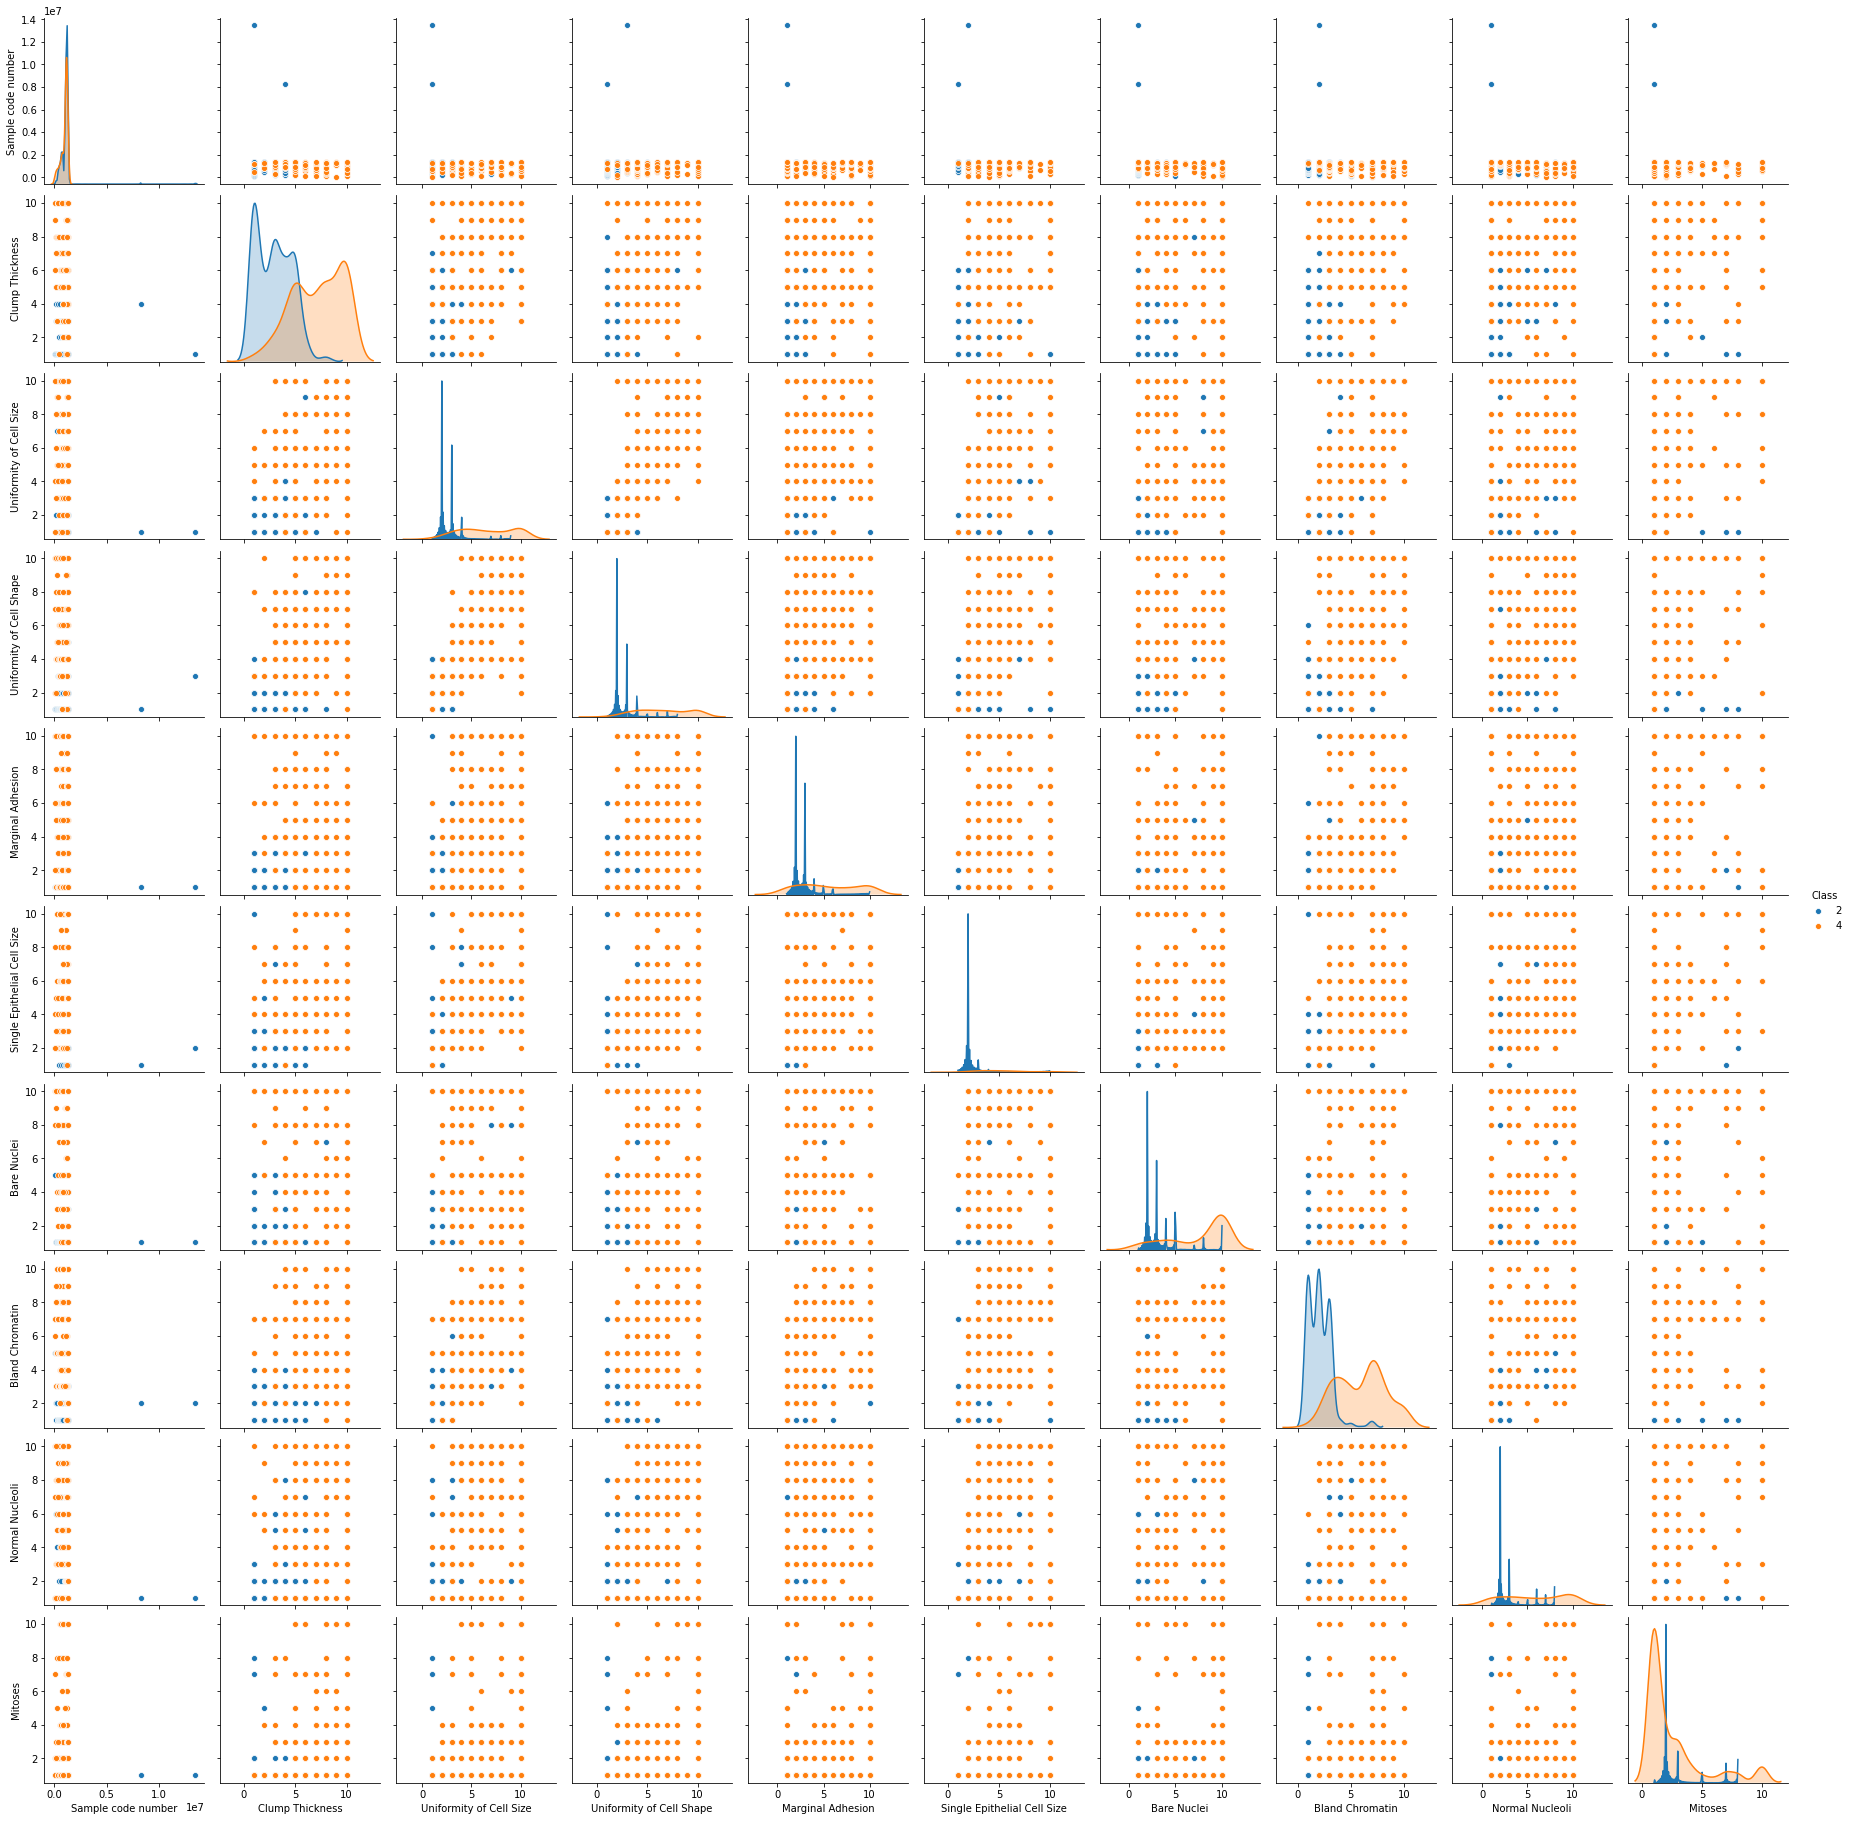

In [9]:
# What if we plotted a pair plot for the dataset
sns.pairplot(Dataset,hue='Class',kind='scatter')

# Calculating the Covarience


In [10]:
from scipy.stats import pearsonr
cor1,_ = pearsonr(Dataset['Bare Nuclei'],Dataset['Clump Thickness'])
print('The person Covariance is :{%.2f}'% cor1)

The person Covariance is :{0.59}


In [11]:
cov = Dataset.cov()
print(cov)

                             Sample code number  ...         Class
Sample code number                 3.851990e+11  ... -50182.138530
Clump Thickness                   -9.865072e+04  ...      1.924698
Uniformity of Cell Size           -7.875035e+04  ...      2.401635
Uniformity of Cell Shape          -7.831383e+04  ...      2.344753
Marginal Adhesion                 -1.237935e+05  ...      1.931353
Single Epithelial Cell Size       -6.711612e+04  ...      1.466310
Bare Nuclei                       -2.244527e+05  ...      2.861663
Bland Chromatin                   -9.421307e+04  ...      1.773086
Normal Nucleoli                   -9.605457e+04  ...      2.094262
Mitoses                           -4.083456e+04  ...      0.700382
Class                             -5.018214e+04  ...      0.911246

[11 rows x 11 columns]


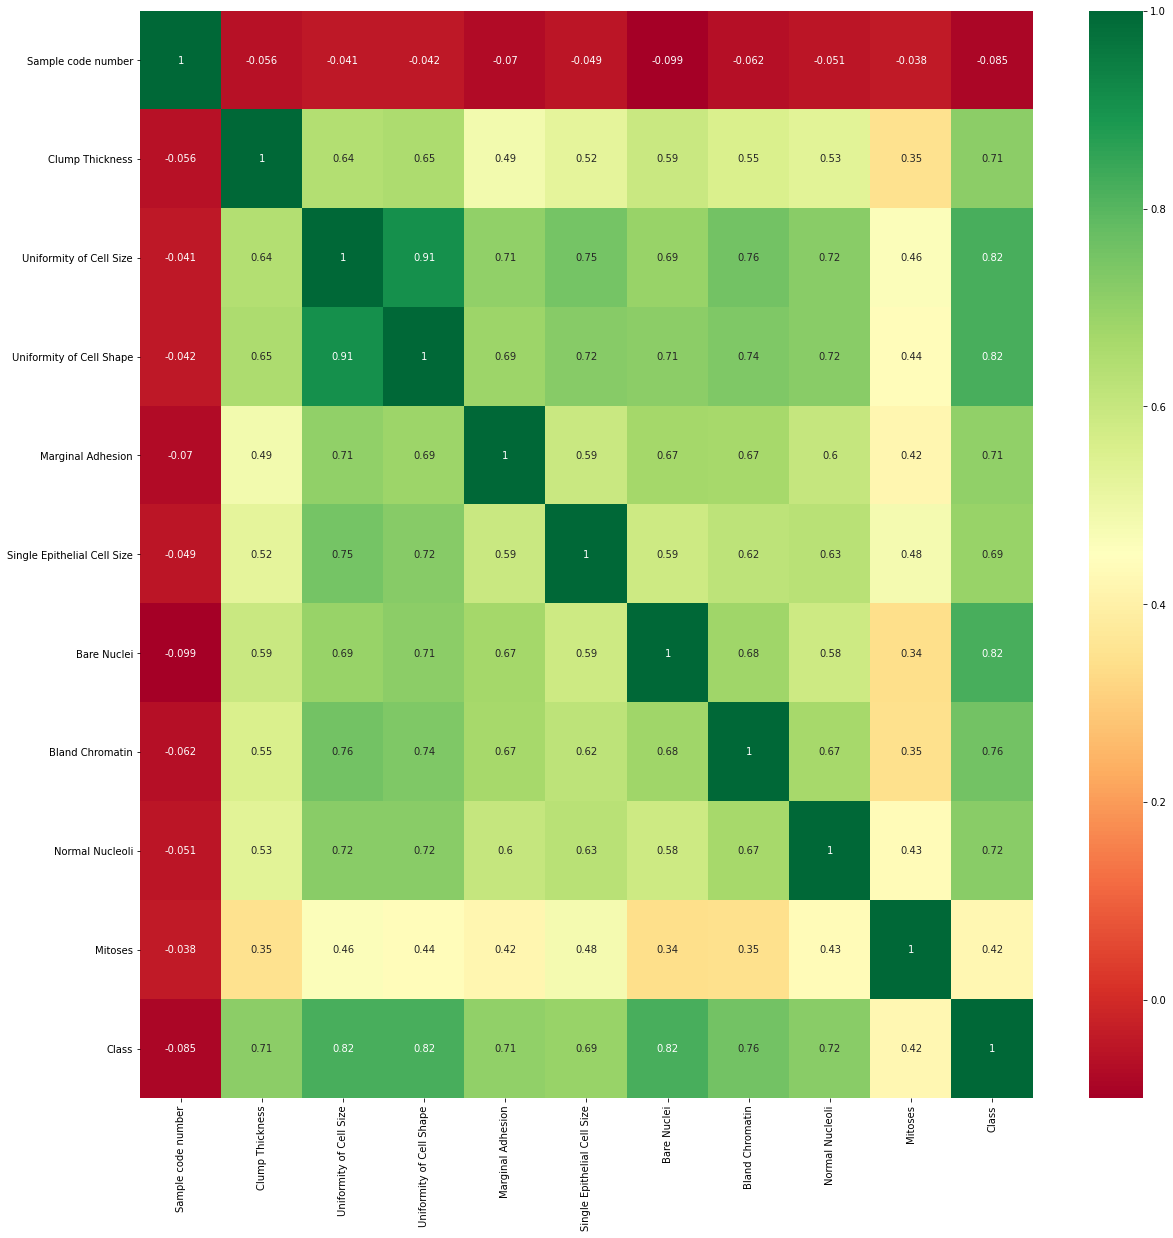

In [15]:
# Covariance heatmap using sns
corrmat = Dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(Dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Making the Model

In [18]:
# splitting the dataset
Dataset.drop('Sample code number',axis=1,inplace=True)

In [19]:
Dataset

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,2
679,2,1,1,1,2,1,1,1,1,2
680,5,10,10,3,7,3,8,10,2,4
681,4,8,6,4,3,4,10,6,1,4


In [19]:
# spliting the Dataset into Dependent and independent Values
X = Dataset.iloc[:,:-1].values
y = Dataset.iloc[:,-1].values 

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = SelectKBest(score_func=chi2,k=10)
fit = features.fit(X,y)


In [21]:

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

AttributeError: ignored

In [24]:
# Spliting the Dataset into training and testing set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [25]:
print(X_train)

[[ 7  6 10 ...  9 10  2]
 [ 8  3  8 ...  8  9  8]
 [ 8 10 10 ... 10 10  1]
 ...
 [ 1  1  1 ...  1  1  1]
 [ 3  1  1 ...  2  1  1]
 [10  9  7 ...  7  7  1]]


In [45]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X_train)
print(X)

[[ 0.91903747  0.9407658   2.30881719 ...  2.22576767  2.27129602
   0.24623928]
 [ 1.27578287 -0.04290763  1.63138773 ...  1.82407819  1.94996317
   3.74830911]
 [ 1.27578287  2.25233038  2.30881719 ...  2.62745714  2.27129602
  -0.33743902]
 ...
 [-1.22143494 -0.69868992 -0.73961536 ... -0.98774815 -0.62069958
  -0.33743902]
 [-0.50794414 -0.69868992 -0.73961536 ... -0.58605867 -0.62069958
  -0.33743902]
 [ 1.98927367  1.92443923  1.29267301 ...  1.42238871  1.30729749
  -0.33743902]]


In [46]:
# Making the Actuall model

from sklearn.linear_model import LogisticRegression
regresor = LogisticRegression(random_state=0)
regresor.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
# predicting the Values
y_pred = regresor.predict(scaler.fit_transform(X_test))

In [50]:
print(y_pred)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


# Evaluating the Model

In [51]:
from sklearn.metrics import confusion_matrix
conf =confusion_matrix(y_test,y_pred)

In [52]:
print(conf)

[[107   0]
 [ 64   0]]


In [54]:
# printing the accuraacy score

from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
print(score)

0.6257309941520468
